In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [150]:
car = pd.read_csv("quikr_car.csv")
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [151]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [152]:
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [153]:
car.shape

(892, 6)

In [154]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [155]:
backup = car.copy()

In [156]:
car = car[car['year'].str.isnumeric()]

In [157]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    object
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 46.0+ KB


In [158]:
car.shape

(842, 6)

In [159]:
car['year'] = car['year'].astype(int)

In [160]:
car['Price'] = car['Price'].str.replace(',','')

In [161]:
car = car[car['Price'].str.isnumeric()]
car['Price'] = car['Price'].astype(int)

In [162]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [163]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)

In [164]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [165]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [166]:
car = car[~car['fuel_type'].isna()]

In [167]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [168]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [169]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [170]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [171]:
car.shape

(816, 6)

In [172]:
car = car.reset_index(drop=True)

In [173]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


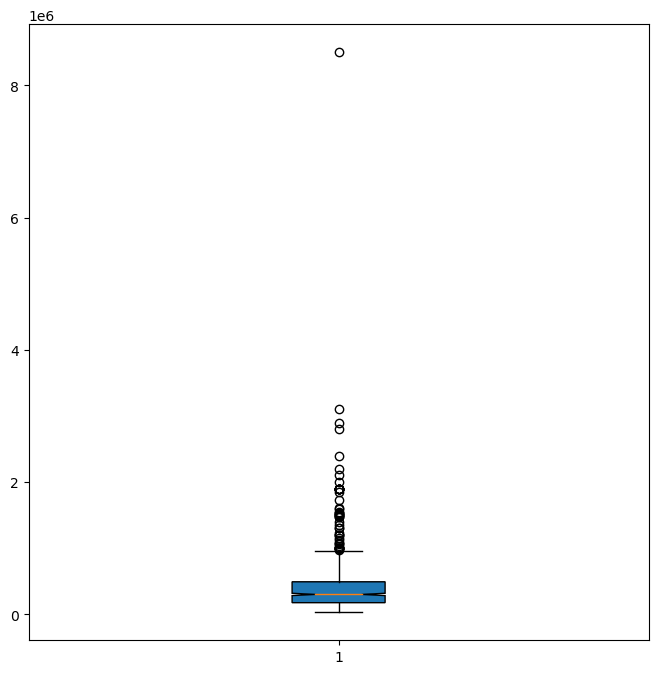

In [174]:
plt.figure(figsize=(8,8))
plt.boxplot(car['Price'], notch=True, patch_artist=True)
plt.show()

In [175]:
car['Price'].describe()

count    8.160000e+02
mean     4.117176e+05
std      4.751844e+05
min      3.000000e+04
25%      1.750000e+05
50%      2.999990e+05
75%      4.912500e+05
max      8.500003e+06
Name: Price, dtype: float64

In [176]:
car = car[car['Price']<6e6].reset_index(drop=True)

In [177]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [178]:
car.to_csv('cleaned_car.csv')

In [179]:
X = car.drop(columns='Price')
y = car['Price']
x_train,x_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=661)

In [180]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [181]:
len(car['company'].unique())

25

In [182]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company','fuel_type']])

OneHotEncoder()

In [183]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']), remainder='passthrough')

In [184]:
lr = LinearRegression()

In [185]:
pipe = make_pipeline(column_trans, lr)

In [186]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [187]:
y_pred = pipe.predict(x_test)
y_pred

array([1418035.04893124,  605540.14536361,  321675.21962977,
        562684.753829  ,  612995.65692445,  645088.66100623,
        474136.18731091,   75930.47842462,  529858.59659915,
        391672.52085002,  231549.92986719,  105219.84127914,
        388031.34942697,  458201.78273534,   29163.91042755,
        390114.5527691 ,  294739.18697143,  358469.81405772,
       2152108.11961389,  529753.73183715,  288329.64109392,
        392767.00460821,  183002.06066357,   26168.17913878,
       1823008.76038544,  556493.91181865,  182191.98306437,
        162578.57388522,  501933.63289172,  516673.49992747,
        233420.31456723, 1622674.07579635, 1092511.04215326,
        362884.26258203,  437746.20414796,  488113.27180146,
        156489.26214942,  237898.26828022,  405291.30064443,
       1077124.12761495,  403808.04785946,  296857.55680712,
        162578.57388522,  662156.56477919,  119493.32877354,
        231265.5001967 ,  459589.53933945,  385962.49510109,
        251327.77309167,

In [188]:
r2_score(y_test,y_pred)

0.7687475575654401

In [189]:
import pickle
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))